In [1]:
# Import my packages.
import flymovie as fm
import os
import copy
import scipy
import skimage as ski
import scipy.ndimage as ndi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
import dask
from time import sleep
import seaborn as sns
import itertools

from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

from importlib import reload

# Activate package autoload.
%load_ext autoreload
%autoreload 2

In [2]:
folder = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/colleen_blobs'
files = os.listdir(folder)
images = []
filenames = []
for i in range(0, len(files)):
    if files[i][0] != '.':
        new = fm.read_czi(os.path.join(folder, files[i]))
        new = new[:,0]
        new = np.expand_dims(new, axis=0)
        images.append(new)
        filenames.append(files[i])
    


In [3]:
filenames

['Experiment-2605.czi',
 'Experiment-823.czi',
 'Experiment-3708.czi',
 'Experiment-2628.czi',
 'Experiment-3709.czi',
 'Experiment-1783.czi',
 'Experiment-1796.czi',
 'Experiment-1789.czi',
 'Experiment-1822.czi',
 'Experiment-1808.czi',
 'Experiment-2618.czi',
 'Experiment-2591.czi',
 'Experiment-2631.czi',
 'Experiment-3711.czi',
 'Experiment-784.czi',
 'Experiment-795.czi',
 'Experiment-2608.czi',
 'Experiment-806.czi']

In [ ]:
n = 0
print(filenames[n])
fm.viewer(images[n])


In [135]:
im = fm.read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/colleen_blobs/Experiment-2605.czi')
im = np.swapaxes(im, 0, 1)
im.shape

(2, 12, 1024, 1024)

In [136]:
his = im[1].copy()
his = ndi.gaussian_filter(his, 3)
t = 2000
mask = np.where(his > t, 1, 0)
lmask, _ = ndi.label(mask)
lmask = fm.labelmask_apply_morphology(lmask, ndi.morphology.binary_dilation, struct=np.ones([1, 3, 3]), expand_size=(1, 3, 3))
fm.viewer(lmask)


interactive(children=(Dropdown(description='Color', index=8, options=('gray', 'Gators', 'inferno', 'viridis', …

In [151]:
nucmask = lmask[:, 400:600, 400:600]
im_temp = im[0,:,400:600,400:600]
bg_mean=2700
bg_var=1500
blob_intensity_mean=500
blob_intensity_var=2500
blob_radius_mean=0.4
blob_radius_var=0.4
blob_number=1600
z_ij_ratio=2

sim = fm.simulate_blobs(nucmask=nucmask, bg_mean=bg_mean, bg_var=bg_var, blob_intensity_mean=blob_intensity_mean, blob_intensity_var=blob_intensity_var,
    blob_radius_mean=blob_radius_mean, blob_radius_var=blob_radius_var, blob_number=blob_number)

#sim = np.where(sim < 0, 0, sim)

fm.viewer([np.where(nucmask, sim, im_temp), im_temp], 6, init_maxval=10_000)

interactive(children=(Dropdown(description='Color', index=8, options=('gray', 'Gators', 'inferno', 'viridis', …

In [153]:
nucmask = lmask
im_temp = im[0]
bg_mean=2700
bg_var=1500
blob_intensity_mean=500
blob_intensity_var=2500
blob_radius_mean=0.4
blob_radius_var=0.4
blob_number=1600
z_ij_ratio=2

sim = fm.simulate_blobs(nucmask=nucmask, bg_mean=bg_mean, bg_var=bg_var, blob_intensity_mean=blob_intensity_mean, blob_intensity_var=blob_intensity_var,
    blob_radius_mean=blob_radius_mean, blob_radius_var=blob_radius_var, blob_number=blob_number)

#sim = np.where(sim < 0, 0, sim)

fm.viewer([np.where(nucmask, sim, im_temp), im_temp], 6, init_maxval=10_000)

interactive(children=(Dropdown(description='Color', index=8, options=('gray', 'Gators', 'inferno', 'viridis', …

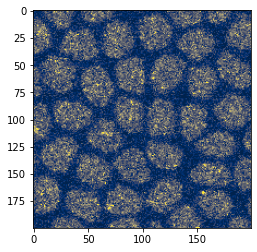

In [179]:
#plt.imshow(np.where(nucmask, sim, im_temp)[8], vmax=10_000, cmap='cividis')
plt.imshow(im_temp[8, 400:600, 400:600], vmax=10_000, cmap='cividis')
plt.savefig('/Users/michaelstadler/Bioinformatics/Projects/rpb1/results/colleen_reunion/2605_real_zoomed.png', dpi=5000)

In [ ]:
# Stashed best params
nucmask = lmask[:, 400:600, 400:600]
im_temp = im[0,:,400:600,400:600]
bg_mean=2700
bg_var=1500
blob_intensity_mean=500
blob_intensity_var=2500
blob_radius_mean=0.4
blob_radius_var=0.4
blob_number=1600
z_ij_ratio=2

In [89]:
im = fm.read_czi('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/colleen_blobs/Experiment-1796.czi')
im = np.swapaxes(im, 0, 1)
im = im[:,:20]
fm.viewer(im, 6)

interactive(children=(Dropdown(description='Color', index=8, options=('gray', 'Gators', 'inferno', 'viridis', …

In [93]:
his = im[1].copy()
his = ndi.gaussian_filter(his, 3)
t = 7000
mask = np.where(his > t, 1, 0)
lmask, _ = ndi.label(mask)
lmask = fm.labelmask_apply_morphology(lmask, ndi.morphology.binary_dilation, struct=np.ones([1, 3, 3]), expand_size=(1, 3, 3))
fm.viewer(lmask,5)

interactive(children=(Dropdown(description='Color', index=8, options=('gray', 'Gators', 'inferno', 'viridis', …

In [134]:
nucmask = lmask[:, 400:600, 400:600]
im_temp = im[0,:,400:600,400:600]
bg_mean=27_000
bg_var=4000
blob_intensity_mean=2500
blob_intensity_var=20
blob_radius_mean=0.5
blob_radius_var=0
blob_number=20_000
z_ij_ratio=2

sim = fm.simulate_blobs(nucmask=nucmask, bg_mean=bg_mean, bg_var=bg_var, blob_intensity_mean=blob_intensity_mean, blob_intensity_var=blob_intensity_var,
    blob_radius_mean=blob_radius_mean, blob_radius_var=blob_radius_var, blob_number=blob_number)

#sim = np.where(sim < 0, 0, sim)

fm.viewer([np.where(nucmask, sim, im_temp)[11], im_temp[11]], 6, init_maxval=50_000)

interactive(children=(Dropdown(description='Color', index=8, options=('gray', 'Gators', 'inferno', 'viridis', …

In [129]:
nucmask = lmask[:, 400:600, 400:600]
im_temp = im[0,:,400:600,400:600]
bg_mean=34_000
bg_var=5000
blob_intensity_mean=4000
blob_intensity_var=0
blob_radius_mean=0.4
blob_radius_var=0.4
blob_number=0
z_ij_ratio=2

sim = fm.simulate_blobs(nucmask=nucmask, bg_mean=bg_mean, bg_var=bg_var, blob_intensity_mean=blob_intensity_mean, blob_intensity_var=blob_intensity_var,
    blob_radius_mean=blob_radius_mean, blob_radius_var=blob_radius_var, blob_number=blob_number)

#sim = np.where(sim < 0, 0, sim)

fm.viewer([np.where(nucmask, sim, im_temp)[11], im_temp[11]], 6, init_maxval=50_000)

interactive(children=(Dropdown(description='Color', index=8, options=('gray', 'Gators', 'inferno', 'viridis', …

In [143]:
sim = np.where(nucmask, sim, im_temp)
